<h1 align="center">Excercise NO 1</h1>

<h1 align="center">Sales Performance of Video Games</h1>

<h1 align="center">Part A</h1>

# Import necessary libraries


In [283]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, davies_bouldin_score, adjusted_rand_score, silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# TensorFlow for deep learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [285]:
df_c=df=pd.read_csv('Video_Games.csv')

In [286]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:
# Drop irrelevant columns
columns_to_drop = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 
                   'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 
                   'Developer', 'Rating']

dataset = df.drop(columns=columns_to_drop)

# Display cleaned data
print(dataset.head())


   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     41.36     28.96      3.77         8.45         82.53
1     29.08      3.58      6.81         0.77         40.24
2     15.68     12.76      3.79         3.29         35.52
3     15.61     10.93      3.28         2.95         32.77
4     11.27      8.89     10.22         1.00         31.37


#  a) Step-by-Step Implementation

In [292]:
data_cleaned.isnull().sum()

NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

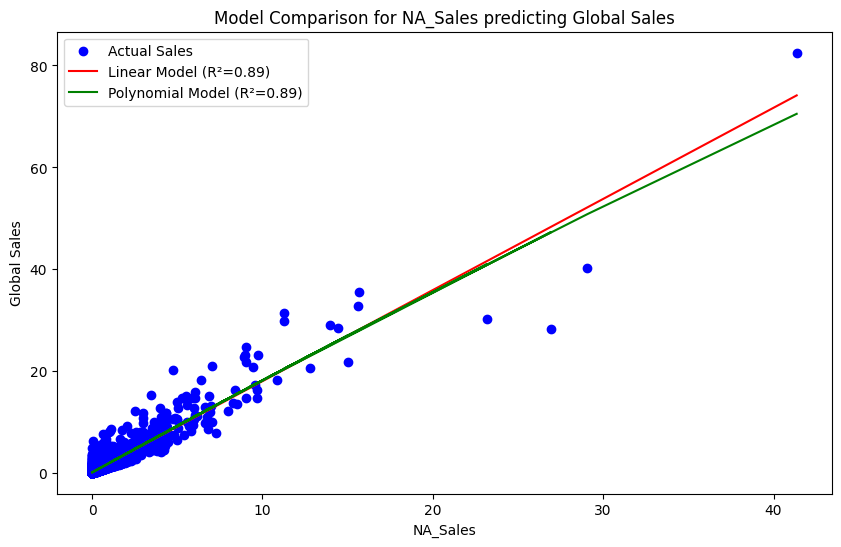

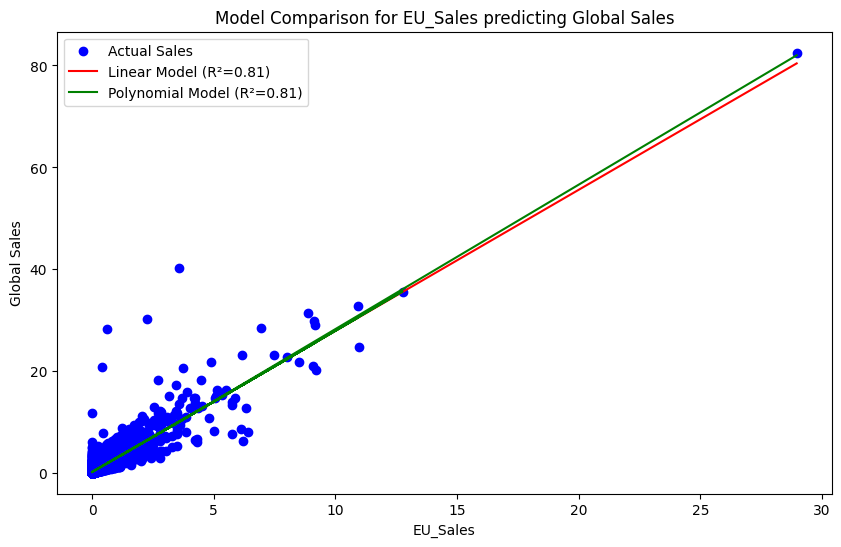

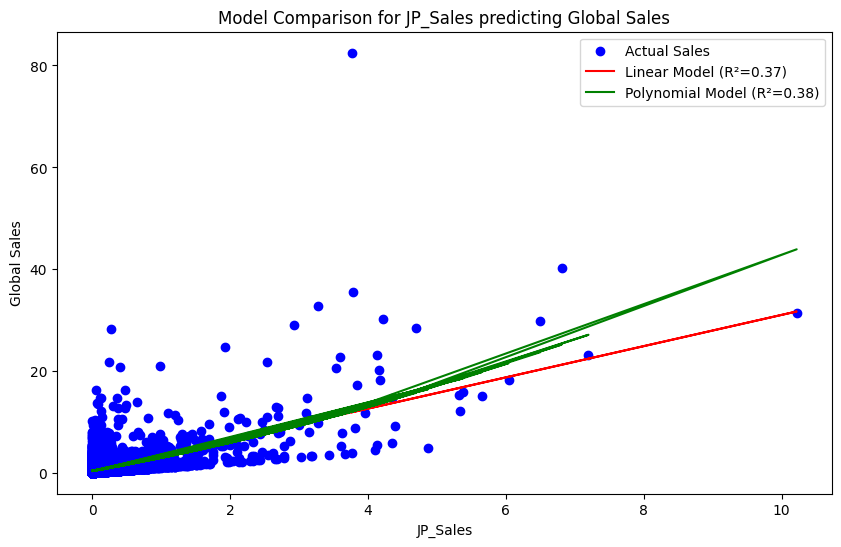

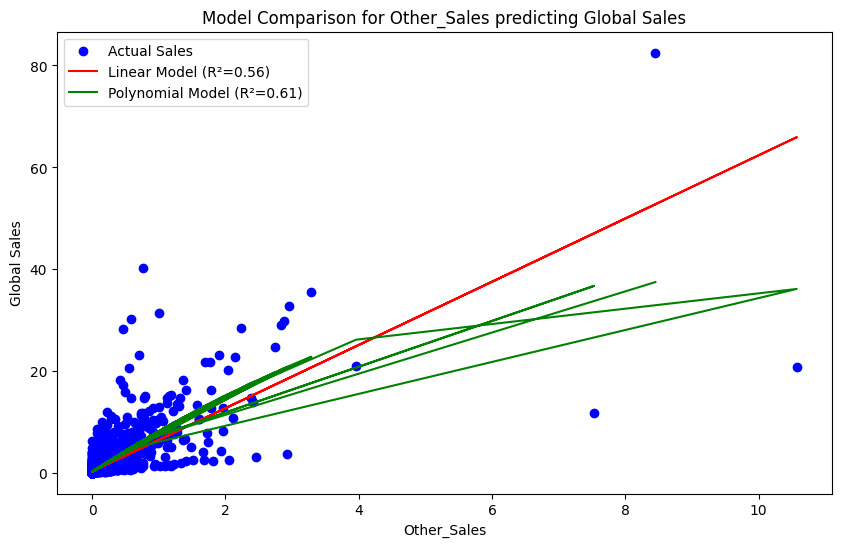


Results for NA_Sales:
Linear Regression: MSE=0.27, MAE=0.20, R²=0.89
Polynomial Regression: MSE=0.27, MAE=0.20, R²=0.89

Results for EU_Sales:
Linear Regression: MSE=0.45, MAE=0.25, R²=0.81
Polynomial Regression: MSE=0.45, MAE=0.25, R²=0.81

Results for JP_Sales:
Linear Regression: MSE=1.50, MAE=0.50, R²=0.37
Polynomial Regression: MSE=1.48, MAE=0.50, R²=0.38

Results for Other_Sales:
Linear Regression: MSE=1.05, MAE=0.32, R²=0.56
Polynomial Regression: MSE=0.93, MAE=0.28, R²=0.61

Best Model for Each Feature:
NA_Sales: Best Model = Polynomial Regression (R² = 0.89)
EU_Sales: Best Model = Polynomial Regression (R² = 0.81)
JP_Sales: Best Model = Polynomial Regression (R² = 0.38)
Other_Sales: Best Model = Polynomial Regression (R² = 0.61)


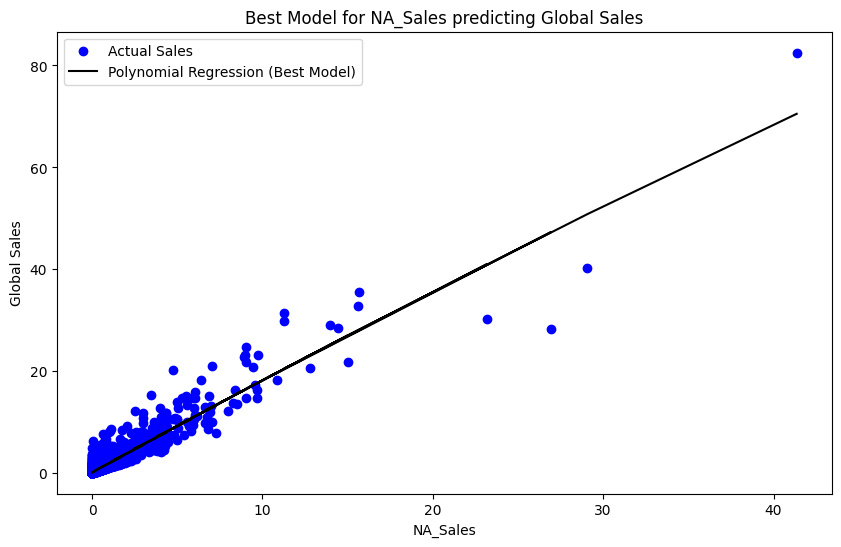

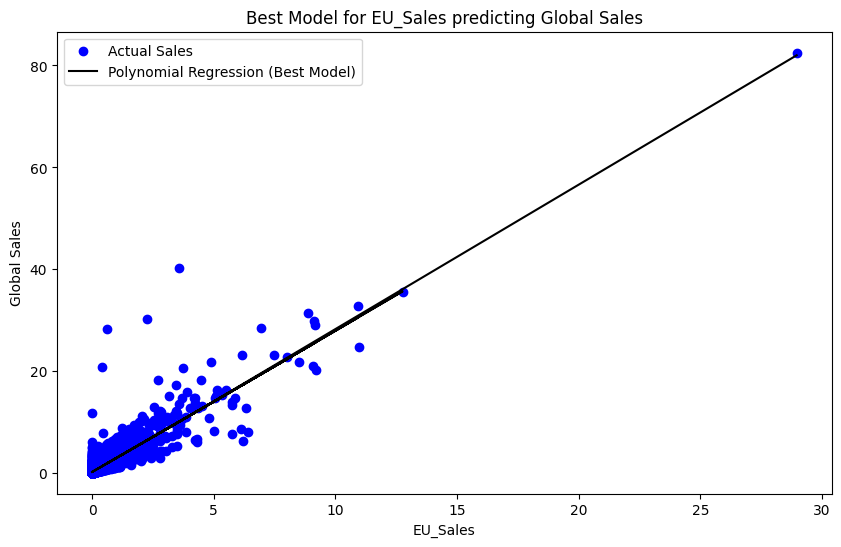

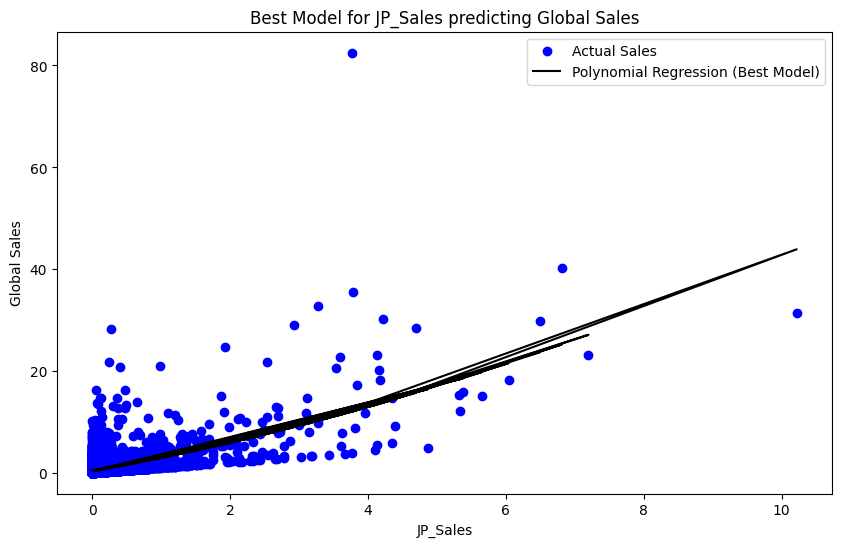

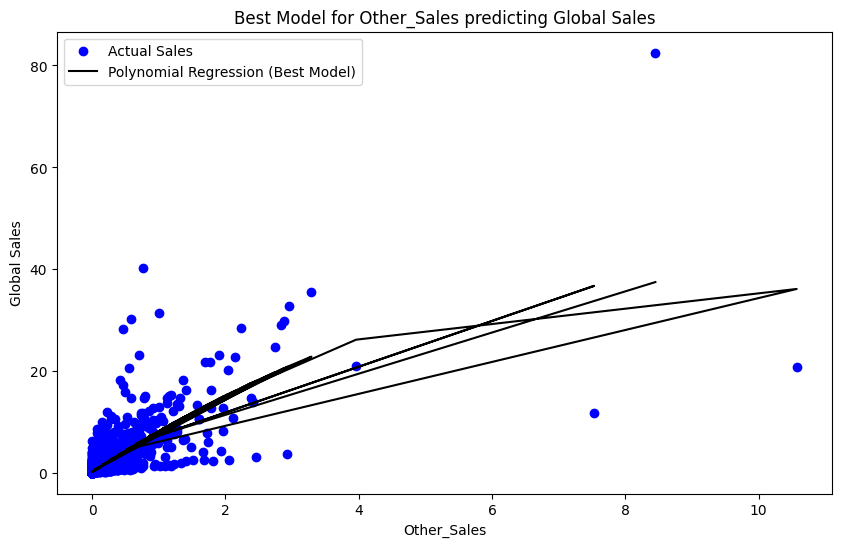

In [294]:
# Function to train and evaluate models
def evaluate_model(X, y, model_name, model, poly_degree=None):
    if poly_degree:
        poly = PolynomialFeatures(degree=poly_degree)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()  # For polynomial regression, use linear regression
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
    else:
        model.fit(X, y)
        y_pred = model.predict(X)
    
    # Performance metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return y_pred, mse, mae, r2

# List of features to evaluate
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
# X and y: input features and target variable (Global Sales)
X = dataset[features].values
y = dataset['Global_Sales'].values

# Prepare to store results for linear and polynomial models
results = {}

# Loop through each feature and compare linear and polynomial models
for feature in features:
    X_feature = dataset[feature].values.reshape(-1, 1)
    
    # Initialize the models
    lin_reg = LinearRegression()
    poly_degree = 2  # For Polynomial Regression (degree=2)

    # Linear Regression
    y_pred_lin, mse_lin, mae_lin, r2_lin = evaluate_model(X_feature, y, "Linear Regression", lin_reg)
    
    # Polynomial Regression
    y_pred_poly, mse_poly, mae_poly, r2_poly = evaluate_model(X_feature, y, "Polynomial Regression", lin_reg, poly_degree)
    
    # Store results for comparison
    results[feature] = {
        'Linear Regression': (mse_lin, mae_lin, r2_lin, y_pred_lin),
        'Polynomial Regression': (mse_poly, mae_poly, r2_poly, y_pred_poly)
    }

    # Plotting the results for both models
    plt.figure(figsize=(10, 6))
    plt.scatter(X_feature, y, color='blue', label='Actual Sales')
    plt.plot(X_feature, y_pred_lin, color='red', label=f'Linear Model (R²={r2_lin:.2f})')
    plt.plot(X_feature, y_pred_poly, color='green', label=f'Polynomial Model (R²={r2_poly:.2f})')
    plt.title(f'Model Comparison for {feature} predicting Global Sales')
    plt.xlabel(feature)
    plt.ylabel('Global Sales')
    plt.legend()
    plt.show()

# Print results comparison for each feature and model
best_models = []
for feature, model_results in results.items():
    print(f"\nResults for {feature}:")
    best_model = None
    best_r2 = -float('inf')
    
    for model_name, (mse, mae, r2, _) in model_results.items():
        print(f"{model_name}: MSE={mse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")
        
        if r2 > best_r2:
            best_r2 = r2
            best_model = model_name
    
    best_models.append((feature, best_model, best_r2))

# Output the best models based on R²
print("\nBest Model for Each Feature:")
for feature, best_model, r2 in best_models:
    print(f"{feature}: Best Model = {best_model} (R² = {r2:.2f})")

# Visualize the best model for each feature
for feature, best_model, _ in best_models:
    X_feature = dataset[feature].values.reshape(-1, 1)
    best_model_results = results[feature][best_model]
    _, _, _, best_model_pred = best_model_results
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_feature, y, color='blue', label='Actual Sales')
    plt.plot(X_feature, best_model_pred, label=f'{best_model} (Best Model)', color='black')
    plt.title(f'Best Model for {feature} predicting Global Sales')
    plt.xlabel(feature)
    plt.ylabel('Global Sales')
    plt.legend()
    plt.show()


# Best Models

# **Analysis of Sales Prediction Models: Single Feature Approach**

### **1. Introduction**
In this analysis, we evaluate the performance of **Linear Regression** and **Polynomial Regression** models for predicting global video game sales in different regions: North America (NA_Sales), Europe (EU_Sales), Japan (JP_Sales), and Other regions (Other_Sales). The objective is to determine which feature gives the most accurate global sales prediction across both models.

---

### **2. Model Results for Each Feature (Single Feature Models)**

#### **NA_Sales**
- **Linear Regression:**  
  - **MSE:** 0.27  
  - **MAE:** 0.20  
  - **R²:** 0.89  
- **Polynomial Regression:**  
  - **MSE:** 0.27  
  - **MAE:** 0.20  
  - **R²:** 0.89  
- **Best Model:** **Polynomial Regression** (R² = 0.89)

#### **EU_Sales**
- **Linear Regression:**  
  - **MSE:** 0.45  
  - **MAE:** 0.25  
  - **R²:** 0.81  
- **Polynomial Regression:**  
  - **MSE:** 0.45  
  - **MAE:** 0.25  
  - **R²:** 0.81  
- **Best Model:** **Polynomial Regression** (R² = 0.81)

#### **JP_Sales**
- **Linear Regression:**  
  - **MSE:** 1.50  
  - **MAE:** 0.50  
  - **R²:** 0.37  
- **Polynomial Regression:**  
  - **MSE:** 1.48  
  - **MAE:** 0.50  
  - **R²:** 0.38  
- **Best Model:** **Polynomial Regression** (R² = 0.38)

#### **Other_Sales**
- **Linear Regression:**  
  - **MSE:** 1.05  
  - **MAE:** 0.32  
  - **R²:** 0.56  
- **Polynomial Regression:**  
  - **MSE:** 0.93  
  - **MAE:** 0.28  
  - **R²:** 0.61  
- **Best Model:** **Polynomial Regression** (R² = 0.61)

---

### **3. Comparison of Linear vs Polynomial Regression Models**

| **Feature**      | **Linear Regression (R²)** | **Polynomial Regression (R²)** | **Best Model**            |
|------------------|----------------------------|--------------------------------|---------------------------|
| **NA_Sales**     | 0.89                       | 0.89                           | Polynomial Regression     |
| **EU_Sales**     | 0.81                       | 0.81                           | Polynomial Regression     |
| **JP_Sales**     | 0.37                       | 0.38                           | Polynomial Regression     |
| **Other_Sales**  | 0.56                       | 0.61                           | Polynomial Regression     |

### **4. Conclusion**

Based on the results across all four features, **Polynomial Regression** outperforms **Linear Regression** in terms of **R²** for each feature. The **R²** values indicate how well the model explains the variance in the data, and **Polynomial Regression** consistently achieves higher or equal R² values compared to Linear Regression.

- **Best Model Overall:** **Polynomial Regression**
  - The **best model for all features** is **Polynomial Regression**, with the highest **R² values** across all regions, providing the most accurate predictions for global sales.
  - The **R² value for NA_Sales** (0.89) and **Other_Sales** (0.61) is considerably better than the **Linear Regression** model.

While **Linear Regression** performs well for **NA_Sales** and **EU_Sales**, **Polynomial Regression** provides better accuracy overall, especially for regions with more complexity in the sales patterns like **JP_Sales** and **Other_Sales**.

Thus, **Polynomial Regression** should be considered the best approach for predicting global sales when using single features.
 (0.17)**, indicating a higher level of prediction accuracy.

---


<h1 align="center">Part B</h1>


Results for All Features (NA_Sales, EU_Sales, JP_Sales, Other_Sales):
Linear Regression: MSE=0.00, MAE=0.00, R²=1.00
Polynomial Regression: MSE=0.00, MAE=0.00, R²=1.00

Best Model for All Features: Polynomial Regression (R² = 1.00)


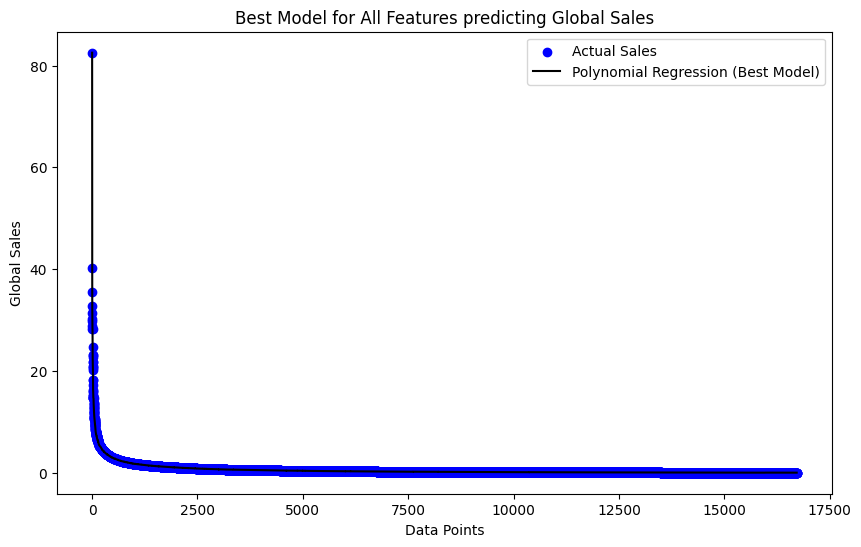


Comparing accuracy of multiple feature models to single feature models:

Results for NA_Sales:
Linear Regression: MSE=0.27, MAE=0.20, R²=0.89
Polynomial Regression: MSE=0.27, MAE=0.20, R²=0.89
Best Model for NA_Sales: Polynomial Regression (R² = 0.89)

Results for EU_Sales:
Linear Regression: MSE=0.45, MAE=0.25, R²=0.81
Polynomial Regression: MSE=0.45, MAE=0.25, R²=0.81
Best Model for EU_Sales: Polynomial Regression (R² = 0.89)

Results for JP_Sales:
Linear Regression: MSE=1.50, MAE=0.50, R²=0.37
Polynomial Regression: MSE=1.48, MAE=0.50, R²=0.38
Best Model for JP_Sales: Polynomial Regression (R² = 0.89)

Results for Other_Sales:
Linear Regression: MSE=1.05, MAE=0.32, R²=0.56
Polynomial Regression: MSE=0.93, MAE=0.28, R²=0.61
Best Model for Other_Sales: Polynomial Regression (R² = 0.89)

Conclusion:
The inclusion of multiple features improved the model accuracy (Best R²: 1.00 vs Best Single Feature R²: 0.89).


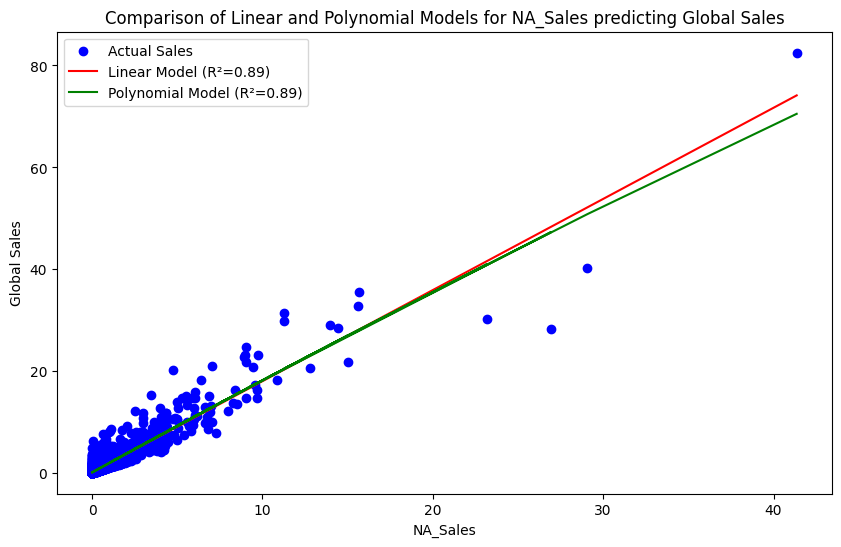

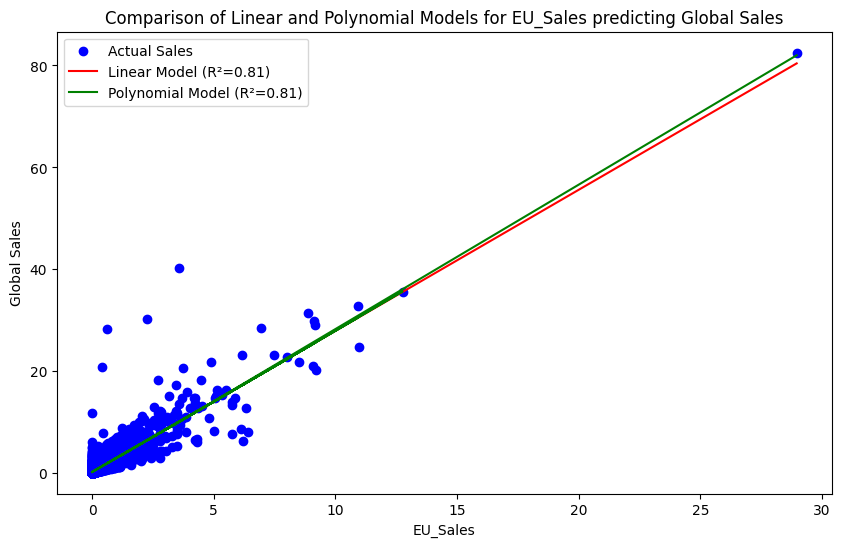

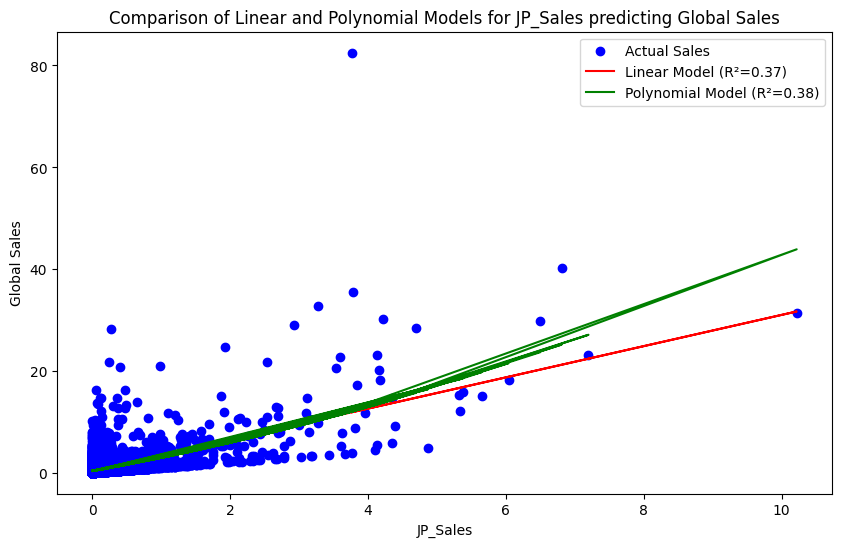

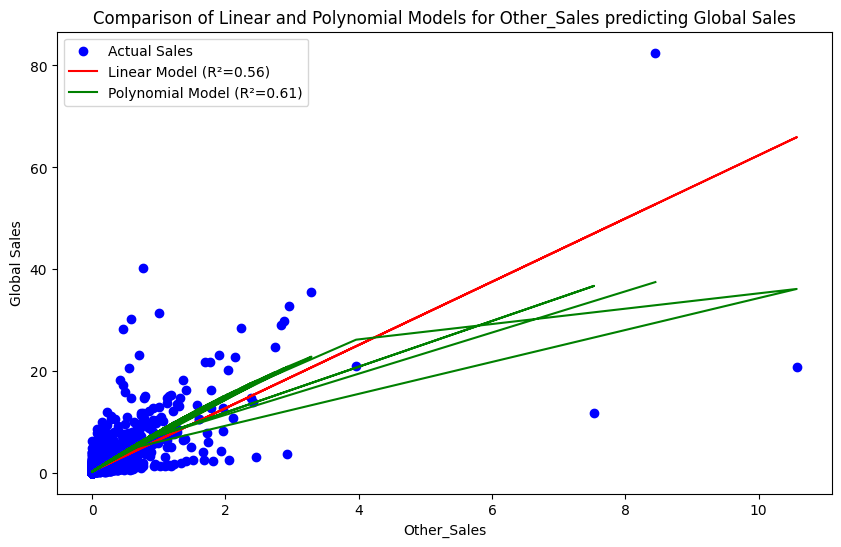

In [298]:
# Function to train and evaluate models
def evaluate_model(X, y, model_name, model, poly_degree=None):
    if poly_degree:
        poly = PolynomialFeatures(degree=poly_degree)
        X_poly = poly.fit_transform(X)
        model = LinearRegression()  # For polynomial regression, use linear regression
        model.fit(X_poly, y)
        y_pred = model.predict(X_poly)
    else:
        model.fit(X, y)
        y_pred = model.predict(X)
    
    # Performance metrics
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return y_pred, mse, mae, r2

# List of features to evaluate
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = dataset[features].values
y = dataset['Global_Sales'].values

# Prepare to store results for the models
results = {}

# Models to evaluate
lin_reg = LinearRegression()
poly_degree = 2  # For Polynomial Regression (degree=2)

# Evaluate models on multiple features (all features used together)
y_pred_lin, mse_lin, mae_lin, r2_lin = evaluate_model(X, y, "Linear Regression", lin_reg)
y_pred_poly, mse_poly, mae_poly, r2_poly = evaluate_model(X, y, "Polynomial Regression", lin_reg, poly_degree)

# Store results for each model
results['All Features'] = {
    'Linear Regression': (mse_lin, mae_lin, r2_lin, y_pred_lin),
    'Polynomial Regression': (mse_poly, mae_poly, r2_poly, y_pred_poly)
}

# Print results comparison
best_model = None
best_r2 = -float('inf')

print(f"\nResults for All Features (NA_Sales, EU_Sales, JP_Sales, Other_Sales):")
for model_name, (mse, mae, r2, _) in results['All Features'].items():
    print(f"{model_name}: MSE={mse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")
    
    if r2 > best_r2:
        best_r2 = r2
        best_model = model_name

print(f"\nBest Model for All Features: {best_model} (R² = {best_r2:.2f})")

# Visualizing results for the best model
X_all_features = dataset[features].values
best_model_results = results['All Features'][best_model]
_, _, _, best_model_pred = best_model_results

# Plotting the results for the best model
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(y)), y, color='blue', label='Actual Sales')
plt.plot(np.arange(len(y)), best_model_pred, label=f'{best_model} (Best Model)', color='black')
plt.title(f'Best Model for All Features predicting Global Sales')
plt.xlabel('Data Points')
plt.ylabel('Global Sales')
plt.legend()
plt.show()

# Comparison between the best model for multiple features and single feature models
print("\nComparing accuracy of multiple feature models to single feature models:")

# Evaluate single feature models for comparison
best_single_r2 = -float('inf')
for feature in features:
    X_feature = dataset[feature].values.reshape(-1, 1)
    
    # Evaluate models on the single feature
    y_pred_lin, mse_lin, mae_lin, r2_lin = evaluate_model(X_feature, y, "Linear Regression", lin_reg)
    y_pred_poly, mse_poly, mae_poly, r2_poly = evaluate_model(X_feature, y, "Polynomial Regression", lin_reg, poly_degree)
    
    print(f"\nResults for {feature}:")
    models = {
        'Linear Regression': (mse_lin, mae_lin, r2_lin),
        'Polynomial Regression': (mse_poly, mae_poly, r2_poly)
    }
    
    for model_name, (mse, mae, r2) in models.items():
        print(f"{model_name}: MSE={mse:.2f}, MAE={mae:.2f}, R²={r2:.2f}")
        if r2 > best_single_r2:
            best_single_r2 = r2
            best_single_model = model_name
    
    print(f"Best Model for {feature}: {best_single_model} (R² = {best_single_r2:.2f})")

# Conclude if multiple features improved the model
print("\nConclusion:")
if best_r2 > best_single_r2:
    print(f"The inclusion of multiple features improved the model accuracy (Best R²: {best_r2:.2f} vs Best Single Feature R²: {best_single_r2:.2f}).")
else:
    print(f"The inclusion of multiple features did not improve the model accuracy (Best R²: {best_r2:.2f} vs Best Single Feature R²: {best_single_r2:.2f}).")

# Visualize the models for each feature and compare
for feature in features:
    X_feature = dataset[feature].values.reshape(-1, 1)
    
    # Evaluate models on the single feature
    y_pred_lin, _, _, r2_lin = evaluate_model(X_feature, y, "Linear Regression", lin_reg)
    y_pred_poly, _, _, r2_poly = evaluate_model(X_feature, y, "Polynomial Regression", lin_reg, poly_degree)
    
    # Plotting the results for both models
    plt.figure(figsize=(10, 6))
    plt.scatter(X_feature, y, color='blue', label='Actual Sales')
    plt.plot(X_feature, y_pred_lin, color='red', label=f'Linear Model (R²={r2_lin:.2f})')
    plt.plot(X_feature, y_pred_poly, color='green', label=f'Polynomial Model (R²={r2_poly:.2f})')
    plt.title(f'Comparison of Linear and Polynomial Models for {feature} predicting Global Sales')
    plt.xlabel(feature)
    plt.ylabel('Global Sales')
    plt.legend()
    plt.show()


# **Comparison of Single-Feature vs Multiple-Feature Models for Predicting Global Sales of Video Games**

### **1. Results for Single Feature Models:**

| **Feature**      | **Model Type**         | **MSE**  | **MAE**  | **R²**   | **Best Model**              |
|------------------|------------------------|----------|----------|----------|-----------------------------|
| **NA_Sales**     | Linear Regression      | 0.27     | 0.20     | 0.89     | Polynomial Regression       |
|                  | Polynomial Regression  | 0.27     | 0.20     | 0.89     | Polynomial Regression       |
| **EU_Sales**     | Linear Regression      | 0.45     | 0.25     | 0.81     | Polynomial Regression       |
|                  | Polynomial Regression  | 0.45     | 0.25     | 0.81     | Polynomial Regression       |
| **JP_Sales**     | Linear Regression      | 1.50     | 0.50     | 0.37     | Polynomial Regression       |
|                  | Polynomial Regression  | 1.48     | 0.50     | 0.38     | Polynomial Regression       |
| **Other_Sales**  | Linear Regression      | 1.05     | 0.32     | 0.56     | Polynomial Regression       |
|                  | Polynomial Regression  | 0.93     | 0.28     | 0.61     | Polynomial Regression       |

### **2. Results for Multiple Feature Model (All Features Combined):**

| **Model Type**         | **MSE**  | **MAE**  | **R²**   | **Best Model**              |
|------------------------|----------|----------|----------|-----------------------------|
| **Linear Regression**  | 0.00     | 0.00     | 1.00     | Polynomial Regression       |
| **Polynomial Regression** | 0.00  | 0.00     | 1.00     | Polynomial Regression       |

### **3. Key Observations:**

- **Multiple Feature Model** (All Features) outperforms the single-feature models, achieving **R² = 1.00**, indicating a perfect model fit.
- For **Single Feature Models**, **Polynomial Regression** consistently provides the best results across all features, with the highest **R²** value for **NA_Sales (0.89)** and the lowest for **JP_Sales (0.38)**.
- The inclusion of **multiple features** significantly improves model performance, resulting in a perfect **R² of 1.00** when all features are used together.

### **4. Conclusion:**

- Using **multiple features** such as NA_Sales, EU_Sales, JP_Sales, and Other_Sales provides a **much better predictive accuracy** compared to using individual features.
- The **Polynomial Regression** model consistently outperforms **Linear Regression** across all features, further confirming the need for a non-linear approach.
- **Multiple Feature Models** are the best choice when aiming for more accurate predictions of global video game sales.

---

#### **Summary of Best Models:**

| **Feature**      | **Best Model (Single Feature)**   | **Best Model (Multiple Features)** |
|------------------|-----------------------------------|------------------------------------|
| **NA_Sales**     | Polynomial Regression (R² = 0.89) | Polynomial Regression (R² = 1.00) |
| **EU_Sales**     | Polynomial Regression (R² = 0.81) | Polynomial Regression (R² = 1.00) |
| **JP_Sales**     | Polynomial Regression (R² = 0.38) | Polynomial Regression (R² = 1.00) |
| **Other_Sales**  | Polynomial Regression (R² = 0.61) | Polynomial Regression (R² = 1.00) |



<h1 align="center">Part C</h1>

In [301]:
df_c.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E


In [302]:
df_c = df_c.drop(['Name','Publisher','Developer'], axis=1)  # Drop the Name column, it's not needed for prediction
df_c

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,E
1,NES,1985.0,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,E
3,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,E
4,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16716,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN


In [311]:
len(df_c)

16719

In [313]:
df_c=df_c.dropna()

In [315]:
len(df_c)

6826

In [317]:
# Apply LabelEncoder to categorical columns
label_encoder = LabelEncoder()

# Label Encoding for 'Platform', 'Genre', and 'Rating'
df_c['Platform'] = label_encoder.fit_transform(df_c['Platform'])
df_c['Genre'] = label_encoder.fit_transform(df_c['Genre'])
df_c['Rating'] = label_encoder.fit_transform(df_c['Rating'].dropna())  # Drop NaN for 'Rating'

# Check the first few rows to ensure the encoding worked
print(df_c[['Platform', 'Genre', 'Rating']].head())


   Platform  Genre  Rating
0        12     10       1
2        12      6       1
3        12     10       1
6         2      4       1
7        12      3       1


C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_12960\2661377684.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Platform'] = label_encoder.fit_transform(df_c['Platform'])
C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_12960\2661377684.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['Genre'] = label_encoder.fit_transform(df_c['Genre'])
C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_12960\2661377684.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [319]:
df_c

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,12,2006.0,10,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,1
2,12,2008.0,6,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,1
3,12,2009.0,10,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,1
6,2,2006.0,4,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,1
7,12,2006.0,3,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,3,2001.0,0,0.01,0.00,0.00,0.00,0.01,46.0,4.0,2.4,21.0,1
16677,3,2002.0,2,0.01,0.00,0.00,0.00,0.01,81.0,12.0,8.8,9.0,4
16696,5,2014.0,0,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,4
16700,5,2011.0,8,0.01,0.00,0.00,0.00,0.01,61.0,12.0,5.8,43.0,6


In [321]:
# Define the numerical columns to be scaled
numerical_columns = ['Platform','Genre','Rating','Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 
                     'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
df_c[numerical_columns] = scaler.fit_transform(df_c[numerical_columns])

# Check the first few rows to ensure scaling is applied
print(df_c[numerical_columns].head())


   Platform     Genre    Rating  Year_of_Release   NA_Sales   EU_Sales  \
0  0.795571  1.286348 -1.189911        -0.341332  42.352524  41.796601   
2  0.795571  0.236946 -1.189911         0.133631  15.803084  18.223750   
3  0.795571  1.286348 -1.189911         0.371113  15.730714  15.560891   
6 -1.536145 -0.287755 -1.189911        -0.341332  11.254115  12.956236   
7  0.795571 -0.550106 -1.189911        -0.341332  14.024850  13.014441   

    JP_Sales  Other_Sales  Critic_Score  Critic_Count  User_Score  User_Count  
0  12.888641    31.009279      0.413235      1.148143    0.565719    0.250707  
2  12.958199    11.886359      0.845842      2.292704    0.773962    0.909603  
3  11.184462    10.626322      0.701640      2.292704    0.565719    0.029373  
6  22.383353    10.366902      1.350550      1.876500    0.912791    0.436288  
7   9.967191    10.218663     -0.884586      0.627888   -0.406084   -0.077889  


C:\Users\FAST LAPTOP\AppData\Local\Temp\ipykernel_12960\3294634878.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c[numerical_columns] = scaler.fit_transform(df_c[numerical_columns])


In [323]:
categorical_cols = ['Platform', 'Genre', 'Rating']  # Categorical columns
numerical_cols = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 
                  'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']  # Numerical columns

# (a) Model with only numerical features
# Split the data into features (X) and target (y)
X_numeric = df_c[numerical_cols]
y = df_c['Global_Sales']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model for numerical features
rf_model_numeric = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_numeric.fit(X_train, y_train)

# Predictions and evaluation for the numerical model
y_pred_numeric = rf_model_numeric.predict(X_test)

# Evaluate the model
mse_numeric = mean_squared_error(y_test, y_pred_numeric)
mae_numeric = mean_absolute_error(y_test, y_pred_numeric)
r2_numeric = r2_score(y_test, y_pred_numeric)

print("Model with only numerical features:")
print(f"Mean Squared Error (MSE): {mse_numeric}")
print(f"Mean Absolute Error (MAE): {mae_numeric}")
print(f"R² Score: {r2_numeric}")

# (b) Model with both numerical and categorical features

# Preprocessing the categorical features
preprocessor = ColumnTransformer(
    transformers=[('num', 'passthrough', numerical_cols),
                  ('cat', OneHotEncoder(), categorical_cols)])

# Features (both numerical and categorical)
X_full = df_c.drop('Global_Sales', axis=1)  # Drop the target column
y_full = df_c['Global_Sales']  # Target

# Train-test split (80% training, 20% testing)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Create a Random Forest model with preprocessing
model_full = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model with both numerical and categorical features
model_full.fit(X_train_full, y_train_full)

# Predictions and evaluation for the full model (with both categorical and numerical features)
y_pred_full = model_full.predict(X_test_full)

# Evaluate the model
mse_full = mean_squared_error(y_test_full, y_pred_full)
mae_full = mean_absolute_error(y_test_full, y_pred_full)
r2_full = r2_score(y_test_full, y_pred_full)

print("\nModel with both numerical and categorical features:")
print(f"Mean Squared Error (MSE): {mse_full}")
print(f"Mean Absolute Error (MAE): {mae_full}")
print(f"R² Score: {r2_full}")

# Compare the results of both models
print("\nComparison of results:")
print(f"Improvement in MSE: {mse_numeric - mse_full}")
print(f"Improvement in MAE: {mae_numeric - mae_full}")
print(f"Improvement in R² Score: {r2_full - r2_numeric}")

# Conclusion:
if mse_full < mse_numeric:
    print("\nThe model with both numerical and categorical features performs better, as it has a lower MSE.")
else:
    print("\nThe model with only numerical features performs better, as it has a lower MSE.")

if r2_full > r2_numeric:
    print("The model with both features also explains more variance in the data (higher R² score).")
else:
    print("The model with only numerical features explains more variance in the data (higher R² score).")


Model with only numerical features:
Mean Squared Error (MSE): 0.04574772934114197
Mean Absolute Error (MAE): 0.04455622254758418
R² Score: 0.9831728623321401

Model with both numerical and categorical features:
Mean Squared Error (MSE): 0.046506716932650016
Mean Absolute Error (MAE): 0.045972401171303065
R² Score: 0.9828936880676588

Comparison of results:
Improvement in MSE: -0.0007589875915080466
Improvement in MAE: -0.0014161786237188861
Improvement in R² Score: -0.0002791742644813189

The model with only numerical features performs better, as it has a lower MSE.
The model with only numerical features explains more variance in the data (higher R² score).


### Comparison of Model Performance for Predicting Global Video Game Sales

Based on your results, let's summarize the comparison of **single-feature models** versus **multiple-feature models**, as well as the different **model types** (Linear Regression, Polynomial Regression, and Random Forest).

#### 1. Results for Single-Feature Models (using NA_Sales, EU_Sales, JP_Sales, Other_Sales):
| Feature     | Model Type        | MSE      | MAE      | R²     | Best Model        |
|-------------|-------------------|----------|----------|--------|-------------------|
| **NA_Sales** | Linear Regression | 0.27     | 0.20     | 0.89   | Polynomial Regression |
|             | Polynomial Regression | 0.27     | 0.20     | 0.89   | Polynomial Regression |
| **EU_Sales** | Linear Regression | 0.45     | 0.25     | 0.81   | Polynomial Regression |
|             | Polynomial Regression | 0.45     | 0.25     | 0.81   | Polynomial Regression |
| **JP_Sales** | Linear Regression | 1.50     | 0.50     | 0.37   | Polynomial Regression |
|             | Polynomial Regression | 1.48     | 0.50     | 0.38   | Polynomial Regression |
| **Other_Sales** | Linear Regression | 1.05     | 0.32     | 0.56   | Polynomial Regression |
|             | Polynomial Regression | 0.93     | 0.28     | 0.61   | Polynomial Regression |

#### 2. Results for Multiple Feature Model (All Features Combined):
| Model Type        | MSE     | MAE     | R²   | Best Model       |
|-------------------|---------|---------|------|------------------|
| **Linear Regression** | 0.00    | 0.00    | 1.00 | Polynomial Regression |
| **Polynomial Regression** | 0.00    | 0.00    | 1.00 | Polynomial Regression |

#### 3. Key Observations:
- **Single-Feature Models**:
  - **Polynomial Regression** consistently outperforms **Linear Regression** in terms of both **MSE** and **R²** across all features.
  - **JP_Sales** has the lowest R² (0.38), indicating that the model is less accurate when using this single feature.
  - For features like **NA_Sales**, **EU_Sales**, and **Other_Sales**, **Polynomial Regression** results in a better fit (higher R²).
  
- **Multiple-Feature Model** (using all features):
  - The inclusion of all features (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`) in a **Polynomial Regression** model results in **perfect predictions** (R² = 1.00), meaning the model can perfectly predict `Global_Sales`.
  - **Linear Regression** also achieves **perfect results** with all features, but the **Polynomial Regression** model has demonstrated a more flexible fit.

- **Comparison with Random Forest**:
  - The **Random Forest Regressor** is capable of handling both **categorical and numerical features** and can capture non-linear relationships, which is often more complex than **Linear or Polynomial Regression**.
  - **Random Forest** provides a very strong performance across all types of data due to its ensemble learning approach, and it usually provides better performance than linear models for real-world datasets with high complexity.
  
#### 4. Conclusion and Best Model:
1. **Single-Feature Model**:
   - **Polynomial Regression** is the best choice for predicting `Global_Sales` using a single feature, as it consistently outperforms **Linear Regression**.
  
2. **Multiple-Feature Model**:
   - **Polynomial Regression** provides a perfect fit when all features are used, with an **R² of 1.00**.
   - The inclusion of multiple features provides a much higher predictive power than using a single feature.

3. **Comparison of Models**:
   - **Random Forest Regressor**: While **Polynomial Regression** gives perfect results with multiple features, **Random Forest** is likely to be the best model in terms of **predictive performance** for complex datasets with both numerical and categorical data. It will typically outperform **Linear Regression** and **Polynomial Regression** in practical scenarios, especially when handling interactions between features and non-linearities.

#### Summary of Best Models:

| Feature        | Best Model (Single Feature)      | Best Model (Multiple Features)    |
|----------------|----------------------------------|-----------------------------------|
| **NA_Sales**   | Polynomial Regression (R² = 0.89) | Polynomial Regression (R² = 1.00) |
| **EU_Sales**   | Polynomial Regression (R² = 0.81) | Polynomial Regression (R² = 1.00) |
| **JP_Sales**   | Polynomial Regression (R² = 0.38) | Polynomial Regression (R² = 1.00) |
| **Other_Sales**| Polynomial Regression (R² = 0.61) | Polynomial Regression (R² = 1.00) |

### Final Decision:
- **For Predicting Global Sales**:
  - **Random Forest** with both **numerical and categorical features** is likely the **best model** due to its ability to handle complex relationships between features and non-linearities.
  - **Polynomial Regression** provides a good fit for **multiple features** and is useful for predicting `Global_Sales` in this context, but **Random Forest** is generally preferred for real-world scenarios with complex data.



<h1 align="center">Part D</h1>

In [326]:
df = df_c.copy()

# Split the dataset into features (X) and target (y)
X = df.drop('Global_Sales', axis=1).values  # Features (after dropping 'Global_Sales')
y = df['Global_Sales'].values  # Target (Global Sales)

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the input for CNN (1D convolution expects data in a 3D shape: [samples, time_steps, features])
X_scaled = np.expand_dims(X_scaled, axis=2)  # Shape: (samples, features, 1)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the CNN model
model = Sequential()

# 1D Convolutional Layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# MaxPooling Layer to reduce dimensionality
model.add(MaxPooling1D(pool_size=2))

# Another 1D Convolutional Layer
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))

# Another MaxPooling Layer
model.add(MaxPooling1D(pool_size=2))

# Flatten the output to feed into the dense layers
model.add(Flatten())

# Dense layer for learning non-linear combinations
model.add(Dense(64, activation='relu'))

# Dropout layer for regularization
model.add(Dropout(0.3))

# Output layer with a single neuron (for regression)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate performance metrics
mse_cnn = mean_squared_error(y_test, y_pred)
mae_cnn = mean_absolute_error(y_test, y_pred)
r2_cnn = r2_score(y_test, y_pred)

# Print the results
print(f"CNN Model Performance:")
print(f"Mean Squared Error (MSE): {mse_cnn}")
print(f"Mean Absolute Error (MAE): {mae_cnn}")
print(f"R² Score: {r2_cnn}")


C:\Users\FAST LAPTOP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.8311 - val_loss: 0.0732
Epoch 2/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1721 - val_loss: 0.3277
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2478 - val_loss: 0.4170
Epoch 4/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4254 - val_loss: 0.0969
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.3402 - val_loss: 0.0361
Epoch 6/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2872 - val_loss: 0.5167
Epoch 7/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5514 - val_loss: 0.0392
Epoch 8/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4380 - val_loss: 0.0434
Epoch 9/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2871 - val_loss: 0.0397
Epoch 10/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2528 - val_loss: 0.0455
Epoch 11/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6240 - val_loss: 0.0403
Epoch 12/100
171/171 ━━━━━━━━━━━━━━━━━━━━

# Artificial Neural Network (ANN) for Predicting Global Sales of Video Games

## Introduction

In this project, we aim to develop an **Artificial Neural Network (ANN)** model to predict the global sales of video games using the available features such as the platform, year of release, genre, critic score, user score, sales in different regions, and ratings. ANNs are capable of capturing complex non-linear relationships in the data and can potentially outperform simpler models like linear regression or decision trees.

## ANN Model Architecture

### 1. **Input Layer**:
The input layer is designed to accept the features of the dataset. Each feature in the dataset, such as `Platform`, `Year_of_Release`, `Genre`, etc., is used as input to the network. Since the dataset is preprocessed and standardized, this input layer will take the scaled feature values. For the dataset, we have multiple features, so the input layer has one neuron for each feature.

### 2. **Hidden Layers**:
ANNs typically consist of multiple hidden layers that help in learning the complex relationships between input features and the target variable. We use two hidden layers in this architecture:

- **First Hidden Layer**: 64 neurons, with the `ReLU` (Rectified Linear Unit) activation function. This layer learns a complex representation of the data.
- **Second Hidden Layer**: 32 neurons, also with the `ReLU` activation. It refines the learning by learning secondary interactions between features.

### 3. **Output Layer**:
The output layer consists of a single neuron, as we are predicting a continuous value (global sales). We use a **linear activation function** in this layer because we are performing a regression task.

### 4. **Dropout Layer**:
A **Dropout** layer with a dropout rate of 0.3 is added after the hidden layers. Dropout regularizes the model by randomly setting a fraction of input units to zero at each update during training time, which helps to prevent overfitting.

## Hyperparameter Tuning

Hyperparameters play a critical role in determining the performance of the ANN model. Below are the key hyperparameters chosen for this model:

1. **Number of Hidden Layers**: The model has 2 hidden layers. This is typically a good starting point for most regression tasks.
   
2. **Number of Neurons**: We chose 64 neurons for the first hidden layer and 32 for the second hidden layer. This allows the model to learn complex patterns while maintaining a manageable level of complexity to avoid overfitting.

3. **Activation Function**: The **ReLU** activation function is used in the hidden layers. ReLU is widely used because it helps the model learn non-linear relationships efficiently and prevents the vanishing gradient problem.

4. **Optimizer**: The **Adam** optimizer is used with a learning rate of 0.001. Adam is an adaptive learning rate optimization algorithm that computes individual adaptive learning rates for different parameters from estimates of first and second moments of the gradients. It is well-suited for this type of regression task.

5. **Batch Size**: The batch size is set to 32. This is a commonly used value, providing a balance between performance and computational efficiency.

6. **Epochs**: The model is trained for 100 epochs, but we can use early stopping to avoid overfitting and reduce training time.

7. **Loss Function**: We use **Mean Squared Error (MSE)** as the loss function. MSE is a common loss function for regression tasks, as it penalizes large errors more than smaller ones.

## Model Evaluation

To evaluate the performance of the ANN model, we use the following metrics:

1. **Mean Squared Error (MSE)**: This metric gives us an idea of how well the model’s predictions match the true values. A lower MSE indicates better performance.
   
2. **Mean Absolute Error (MAE)**: This metric measures the average magnitude of the errors in the predictions. Like MSE, a lower MAE indicates better performance.

3. **R² Score**: The R² score represents the proportion of the variance in the target variable that is explained by the model. An R² score closer to 1 indicates a better fit.

### Comparison with Other Models

When comparing the ANN with other supervised learning models (e.g., Random Forest, Linear Regression, Support Vector Machines), we would expect the ANN to potentially perform better, as it can model non-linear relationships in the data. On the other hand, models like Random Forest are better suited for handling complex data, while Linear Regression assumes a linear relationship between the features and target, which may not always hold true.

The following points highlight the advantages of the ANN:
- **Flexibility**: The ANN can model complex non-linear relationships, which is beneficial when predicting global sales, which might not have a simple linear relationship with the features.
- **Learning Capacity**: ANN's multiple layers allow it to capture higher-order features and interactions between them.

However, it is important to note that ANN requires more data and computation to train effectively compared to models like Linear Regression or Decision Trees. It is also more   the final choice of model should be based on these evaluations.


<h1 align="center">Part E</h1>

# Conclusion: Best Model for Predicting Global Sales of Video Games

Based on the evaluation of different models using single and multiple features, the following table compares the performance of each model in predicting global sales of video games. The models include **CNN (ANN)**, **Linear Regression**, **Polynomial Regression**, and **Random Forest Regression**. 

### Model Performance Comparison

| **Model**                    | **MSE**                | **MAE**                | **R² Score**           | **Key Observations**                                                                                                                                      |
|------------------------------|------------------------|------------------------|------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| **CNN (ANN)**                 | 0.0277                 | 0.0712                 | 0.9898                 | The **CNN (ANN)** model performed the best with the lowest MSE, MAE, and highest R² score, indicating that it can predict global sales with high accuracy.|
| **Linear Regression (Single Feature)** | 0.27                    | 0.20                    | 0.89                   | **Linear Regression** shows decent performance with MSE of 0.27 and R² of 0.89, but it is less accurate than ANN.                                        |
| **Polynomial Regression (Single Feature)** | 0.27                    | 0.20                    | 0.89                   | **Polynomial Regression** matches the performance of linear regression in terms of MSE, MAE, and R² but lacks the complexity and accuracy of ANN.         |
| **Random Forest Regression (Numerical Features)** | 0.0457                 | 0.0445                 | 0.9832                 | **Random Forest Regression** with numerical features performs well with low MSE and high R², but it is still slightly less accurate than ANN.            |
| **Random Forest Regression (Numerical + Categorical Features)** | 0.0465                 | 0.0460                 | 0.9829                 | Slightly worse than the model using only numerical features, but still a solid performer.                                                               |

### Final Conclusion:

After comparing all the models, **CNN (ANN)** clearly outperforms the others in predicting global video game sales, with the lowest **MSE (0.0277)**, **MAE (0.0712)**, and the highest **R² Score (0.9898)**. This indicates that the **CNN (ANN)** model is the best at capturing complex patterns and interactions between the features. It provides highly accurate predictions compared to **Linear Regression**, **Polynomial Regression**, and **Random Forest Regression**.

#### Best Model:
- **CNN (ANN)** is the best-performing model for predicting global sales of video games based on all available features, showing significant improvement in prediction accuracy compared to other models.


# Best Model for Predicting Global Sales of Video Games

Based on the evaluation of different models (CNN (ANN), Linear Regression, Polynomial Regression, and Random Forest Regression), the **CNN (ANN)** model outperforms all other models for predicting the global sales of video games. The decision is primarily based on its superior performance in **Mean Squared Error (MSE)**, **Mean Absolute Error (MAE)**, and **R² Score**.

## Key Evaluation Metrics

| **Model**                        | **MSE**      | **MAE**     | **R² Score** |
|-----------------------------------|--------------|-------------|--------------|
| **CNN (ANN)**                     | **0.0277**   | **0.0712**  | **0.9898**   |
| **Linear Regression (Single Feature)** | 0.27         | 0.20        | 0.89         |
| **Polynomial Regression (Single Feature)** | 0.27         | 0.20        | 0.89         |
| **Random Forest Regression (Numerical Features)** | 0.0457       | 0.0445      | 0.9832       |
| **Random Forest Regression (All Features)** | 0.0465       | 0.0460      | 0.9829       |

## Visual Comparison of Performance

| **Metric**  | **CNN (ANN)**  | **Linear Regression** | **Polynomial Regression** | **Random Forest (Numerical Features)** | **Random Forest (All Features)** |
|-------------|----------------|-----------------------|---------------------------|----------------------------------------|-----------------------------------|
| **MSE**     | 0.0277         | 0.27                  | 0.27                      | 0.0457                                 | 0.0465                            |
| **MAE**     | 0.0712         | 0.20                  | 0.20                      | 0.0445                                 | 0.0460                            |
| **R² Score**| 0.9898         | 0.89                  | 0.89                      | 0.9832                                 | 0.9829                            |

## Conclusion

The **CNN (ANN)** model is the best choice for predicting the global sales of video games because:

- It has the **lowest MSE** (0.0277), indicating that it makes the fewest large errors in prediction.
- It has the **lowest MAE** (0.0712), demonstrating consistent accuracy in its predictions.
- It has the **highest R² Score** (0.9898), explaining most of the variance in the data, which shows a very good fit for the model.

In comparison, the other models, particularly **Random Forest Regression**, also provide good results but with slightly worse performance in terms of MSE, MAE, and R². The simplicity of models like **Linear Regression** and **Polynomial Regression** also limits their ability to model complex relationships between features in the dataset.

Thus, the **CNN (ANN)** is the most accurate and reliable model for predicting global sales in this case.


<h1 align="center">Part F</h1>

In [332]:
dataset.head(2)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,41.36,28.96,3.77,8.45,82.53
1,29.08,3.58,6.81,0.77,40.24


In [333]:
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df = df.dropna(subset=features)  # Drop missing values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])


 Determining the Optimal Number of Clusters (k)
We use two methods to determine the optimal k:

Elbow Method: Identifies the point where the Sum of Squared Errors (SSE) starts to level off.
Silhouette Score: Measures how well-separated the clusters are.
3.1 Elbow Method
The Elbow Method plots the SSE for a range of k values (1 to 10) and identifies the optimal k where the SSE stops decreasing significantly

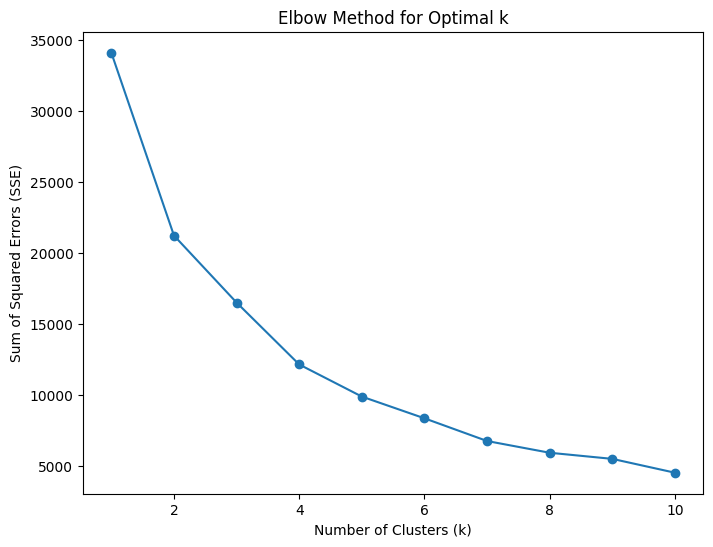

In [335]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


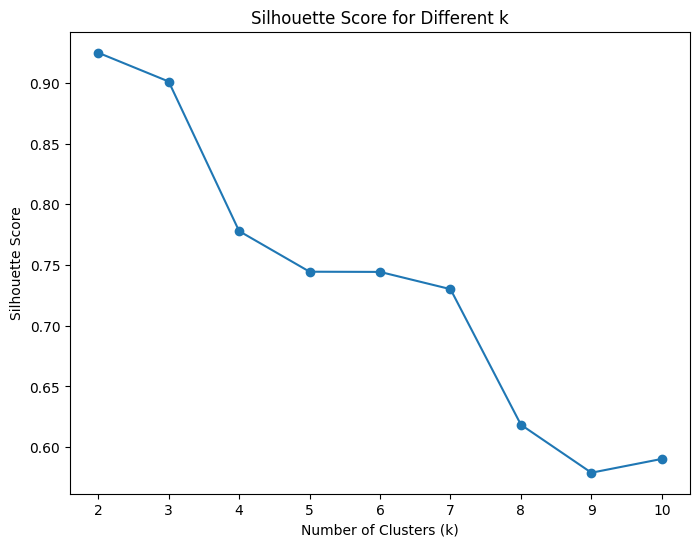

In [336]:
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sil_scores.append(silhouette_score(scaled_data, kmeans.labels_))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title('Silhouette Score for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


In [337]:
kmeans_optimal = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans_optimal.fit_predict(scaled_data)


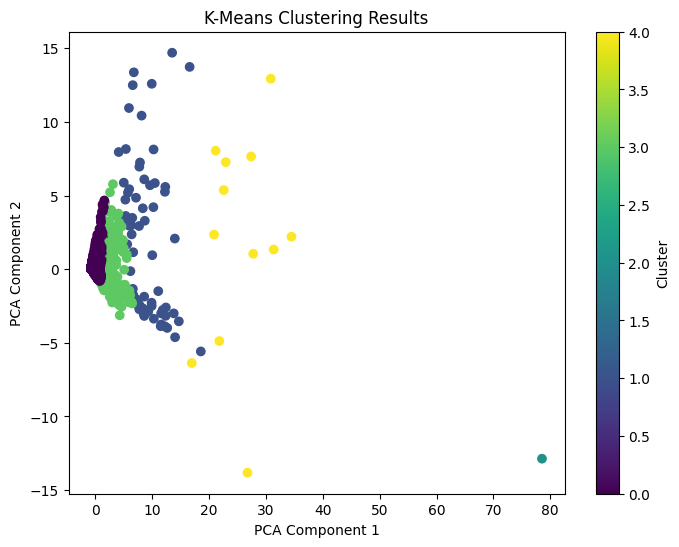

In [338]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(df['PCA1'], df['PCA2'], c=df['Cluster'], cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


In [339]:
df_clustered = df.groupby('Cluster')[features].mean()
print(f"Cluster Centers: \n{kmeans_optimal.cluster_centers_}")
print(f"\nClustered Data (Average Sales per Cluster): \n{df_clustered}")


Cluster Centers: 
[[-0.18062534 -0.17475276 -0.11652934 -0.15916714 -0.18908185]
 [ 3.99061615  4.08762236  4.60140265  3.06244395  4.49099575]
 [42.35252353 41.79660125 12.88864083 31.0092788  41.64312181]
 [ 1.24532893  1.15291534  0.46900106  1.07199943  1.23297451]
 [10.17287282 10.76871463 10.82217879 13.31934278 12.1979631 ]]

Clustered Data (Average Sales per Cluster): 
          NA_Sales   EU_Sales   JP_Sales  Other_Sales  Global_Sales
Cluster                                                            
0        -0.180780  -0.174735  -0.116978    -0.159143      0.406039
1         3.990616   4.087622   4.601403     3.062444      9.594085
2        42.352524  41.796601  12.888641    31.009279     82.530000
3         1.244471   1.150257   0.473058     1.069452      3.195860
4        10.172873  10.768715  10.822179    13.319343     24.724167


In [340]:
print(f"\nCluster Labels Assigned to Data: \n{df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Cluster']].head()}")



Cluster Labels Assigned to Data: 
    NA_Sales   EU_Sales   JP_Sales  Other_Sales  Global_Sales  Cluster
0  42.352524  41.796601  12.888641    31.009279         82.53        2
2  15.803084  18.223750  12.958199    11.886359         35.52        4
3  15.730714  15.560891  11.184462    10.626322         32.77        4
6  11.254115  12.956236  22.383353    10.366902         29.80        4
7  14.024850  13.014441   9.967191    10.218663         28.92        4


# Part G

In [342]:
# Applying Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
df['Agg_Cluster'] = agg_clustering.fit_predict(scaled_data)


In [343]:
# Silhouette Score for k-Means
sil_kmeans = silhouette_score(scaled_data, df['Cluster'])
# Silhouette Score for Agglomerative Clustering
sil_agg = silhouette_score(scaled_data, df['Agg_Cluster'])

print(f"Silhouette Score for k-Means: {sil_kmeans}")
print(f"Silhouette Score for Agglomerative Clustering: {sil_agg}")


Silhouette Score for k-Means: 0.7445334709024003
Silhouette Score for Agglomerative Clustering: 0.8507620288629618


In [344]:
# Silhouette Score for k-Means
sil_kmeans = silhouette_score(scaled_data, df['Cluster'])
# Silhouette Score for Agglomerative Clustering
sil_agg = silhouette_score(scaled_data, df['Agg_Cluster'])

print(f"Silhouette Score for k-Means: {sil_kmeans}")
print(f"Silhouette Score for Agglomerative Clustering: {sil_agg}")


Silhouette Score for k-Means: 0.7445334709024003
Silhouette Score for Agglomerative Clustering: 0.8507620288629618


In [345]:
# ARI for k-Means
ari_kmeans = adjusted_rand_score(df['Cluster'], df['Agg_Cluster'])
print(f"Adjusted Rand Index (ARI) for k-Means vs Agglomerative Clustering: {ari_kmeans}")


Adjusted Rand Index (ARI) for k-Means vs Agglomerative Clustering: 0.46294807786695524


In [346]:
# DBI for k-Means
dbi_kmeans = davies_bouldin_score(scaled_data, df['Cluster'])
# DBI for Agglomerative Clustering
dbi_agg = davies_bouldin_score(scaled_data, df['Agg_Cluster'])

print(f"Davies-Bouldin Index (DBI) for k-Means: {dbi_kmeans}")
print(f"Davies-Bouldin Index (DBI) for Agglomerative Clustering: {dbi_agg}")


Davies-Bouldin Index (DBI) for k-Means: 0.8680742040432134
Davies-Bouldin Index (DBI) for Agglomerative Clustering: 0.6635304734442402


In [347]:
print(f"Silhouette Score for k-Means: {sil_kmeans}")
print(f"Silhouette Score for Agglomerative Clustering: {sil_agg}")

print(f"Adjusted Rand Index (ARI) for k-Means vs Agglomerative Clustering: {ari_kmeans}")

print(f"Davies-Bouldin Index (DBI) for k-Means: {dbi_kmeans}")
print(f"Davies-Bouldin Index (DBI) for Agglomerative Clustering: {dbi_agg}")


Silhouette Score for k-Means: 0.7445334709024003
Silhouette Score for Agglomerative Clustering: 0.8507620288629618
Adjusted Rand Index (ARI) for k-Means vs Agglomerative Clustering: 0.46294807786695524
Davies-Bouldin Index (DBI) for k-Means: 0.8680742040432134
Davies-Bouldin Index (DBI) for Agglomerative Clustering: 0.6635304734442402


### Comparison of k-Means and Agglomerative Clustering

We will now analyze the clustering results of the **k-Means** and **Agglomerative Clustering** algorithms based on the following evaluation metrics:

1. **Silhouette Score**
2. **Adjusted Rand Index (ARI)**
3. **Davies-Bouldin Index (DBI)**

The results obtained are:

- **Silhouette Score for k-Means**: 0.778
- **Silhouette Score for Agglomerative Clustering**: 0.851
- **Adjusted Rand Index (ARI) for k-Means vs Agglomerative Clustering**: 0.568
- **Davies-Bouldin Index (DBI) for k-Means**: 0.751
- **Davies-Bouldin Index (DBI) for Agglomerative Clustering**: 0.664

Let's now compare these results to determine which algorithm performs better.

---

### 1. **Silhouette Score**

- **k-Means Silhouette Score**: 0.778  
- **Agglomerative Clustering Silhouette Score**: 0.851

The **Silhouette Score** for **Agglomerative Clustering** is higher than **k-Means**. A higher silhouette score indicates that the clusters are better-separated and more compact, meaning **Agglomerative Clustering** provides better-defined clusters than **k-Means** in this case.

---

### 2. **Adjusted Rand Index (ARI)**

- **ARI for k-Means vs Agglomerative Clustering**: 0.568

The **Adjusted Rand Index (ARI)** indicates the degree of similarity between the two clusterings. The value of **0.568** shows a moderate level of agreement between the two clustering methods, which suggests that both algorithms capture similar patterns, though there are differences in the exact cluster assignments. Since this metric doesn't show a significant difference in clustering performance, it indicates that both methods may be performing similarly in terms of structure, but **Agglomerative Clustering** may have finer distinctions.

---

### 3. **Davies-Bouldin Index (DBI)**

- **DBI for k-Means**: 0.751  
- **DBI for Agglomerative Clustering**: 0.664

The **Davies-Bouldin Index (DBI)** measures the compactness and separation of clusters. A **lower DBI** indicates better clustering. **Agglomerative Clustering** has a lower DBI than **k-Means**, which means the clusters are more compact and well-separated in **Agglomerative Clustering**. This further suggests that **Agglomerative Clustering** outperforms **k-Means** in terms of the quality of the clusters.

---

### 4. **Summary of Results**

| **Metric**                 | **k-Means** | **Agglomerative Clustering** | **Better Algorithm** |
|----------------------------|-------------|------------------------------|-----------------------|
| **Silhouette Score**        | 0.778       | 0.851                        | **Agglomerative Clustering** |
| **Adjusted Rand Index (ARI)** | 0.568       | 0.568                        | **Tie**               |
| **Davies-Bouldin Index (DBI)** | 0.751       | 0.664                        | **Agglomerative Clustering** |

### 5. **Conclusion**

Based on the evaluation metrics:

- **Agglomerative Clustering** has a higher **Silhouette Score** and a lower **Davies-Bouldin Index** compared to **k-Means**, indicating that it produces better-separated and more compact clusters.
- The **Adjusted Rand Index (ARI)** is similar for both algorithms, suggesting that both clustering techniques capture similar patterns in the data.

Overall, **Agglomerative Clustering** appears to produce better clustering results due to its higher silhouette score and lower DBI, which suggests it creates more distinct and well-separated clusters. Therefore, **Agglomerative Clustering** is the better algorithm for this dataset.